In [0]:
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# We're going to try and fit a linear model: y = w*x + b
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)


In [0]:
def forward(x):
  y = w*x + b
  return y

In [86]:
x1 = torch.tensor(2)
forward(x1)

tensor(7., grad_fn=<AddBackward0>)

In [87]:
x2 = torch.tensor([[4], [7]])
forward(x2)

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)

In [88]:
# Ok, a more standard way is to use the torch Linear module
# So we're going to switch to that now
# We're first setting a seed since the weights and bias start at random values and then we train our model through
# a gradient descent model to obtain the optimal parameters to fit our data
# we want our values that come out of our model to be consistent and reproducible hence we set a seed
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


So from the above notice that our model is currently: \
> y = w * x + b \
> y = 0.5153 * x - 0.4414 \


In [89]:
x3 = torch.tensor([2.0])
print(model(x3))

tensor([0.5891], grad_fn=<AddBackward0>)


In [90]:
x3 = torch.tensor([[2.0], [3.3]])
print(model(x3))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward>)


In [0]:
# We added the import.nn in the import code block
# Template for a new class
# We are using inheritance such that this subclass will leverage code from our base class 
# nn.Module - Module acts as a base class for all neural network modules
# Here the LR class will be a subclass of nn.Module so it inherits methods and variables from
# the parent class
class LR(nn.Module):
  # Constructor to initialise new objects of the class
  # We will use this class to initialise new instances of a linear model
  def __init__(self, input_size, output_size):
    # When using inheritance we need to call super.__init__() which
    # allows freedom for multiple inheritance - this is boiler plate code
    # that needs to be written to create a custom class
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred


In [92]:
torch.manual_seed(1)
# Instantiate a new object of class LR
model = LR(1,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [93]:
x3 = torch.tensor([1.0])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


In [94]:
x3 = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward>)


LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


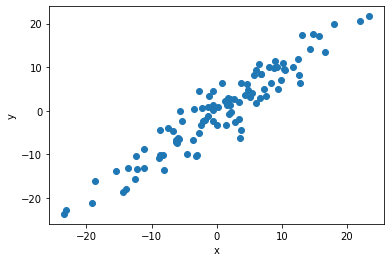

In [112]:
# Create a dataset
# We will create a tensor with random numbers that are normally distributed 
# We give it a seq of integers that define the shape of our tensor - 100 rows and 1 col
X = torch.randn(100,1) * 10
y = X + 3 * torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')


torch.manual_seed(1)
model = LR(1, 1)
print(model)

In [0]:
# # Let's use our data now
# torch.manual_seed(1)
# # Instantiate a new object of class LR
# model = LR(1,1)
# [w, b] = model.parameters()
# # print(w, b)
# # w1 = w[0][0].item()
# # b1 = b[0].item()
# # print(w1, b1)


In [0]:
 [w, b] = model.parameters()
 def get_params(): 
  return(w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  # Our data goes from -30 -> 30
  x1 = np.array([-30, 30])
  y1 = w1 * x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

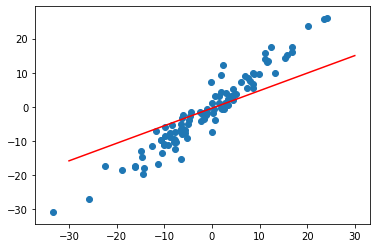

In [107]:
plot_fit(title = 'First Model')

## Fit
As we can see the fit of our line is bad as we have a random weight and bias parameter fitted to the line. We need to use gradient descent to try and correct the line fit, based on the total error.

## Gradient Descent
Initially the model has random parameter values, but we want to move in the direction that gives us the smallest error. If we take the gradient of the error function (the derivative - slope of the tangent at the current value), the derivative will take us in the direction of the highest error ... so what we do is we move in the negative of the gradient since that will take us in the direction of the lowest error. \
We take the current weight and subtract the gradient of the function at that same pt, this will take us in the direction of least error  \
- f'(w) = derivative of the loss function
- substitute in the value of current weight
- Then calc new weight as w1 = w0 - f'(w) 

The new weight should result in a smaller error that the previous weight. We keep doing that iteratively until we obtain the optimal parameters for our linear model to fit the data. \

To obtain optimal results one should descend in really small steps since we don't want it to move too drastically in any one direction. As such we will multiply the gradient by a small number known as the **learning rate**

- f'(w) = derivative of the loss function
- substitute in the value of current weight
- Then calc new weight as $w1 = w0 - \alpha f'(w)$ where $\alpha$ is the learning rate - e.g. $1/10$ or $1/100$







In [0]:
# Loss function - built in
criterion = nn.MSELoss()
# SGD -> stochastic gradient descent, the full calc uses all of the dataset (1/n * sum(actual_y - pred_y))
# On a big data set this calc is very costly
# The SGD minimises the loss one sample at a time and more quickly converges to an 
# answer as it updates weights more frequently based on sample size
optimiser = torch.optim.SGD(model.parameters(), lr = 0.01) # stochastic gradient descent 


In [116]:

# we will train our model for a certain number of times, an epoch is
# a single pass through the entire dataset.
# As we iterate through the dataset we calc the error function and backpropagate
# gradient of the error function to update the weights
# epoch of 1 -> probably leads to undefitting
# epoch of too many -> may lead to overfitting (our dataset has only 100 pts)
epochs = 100
losses = []
for i in range(epochs):
  # make prediction
  y_pred = model.forward(X)
  # compare the actual value vs the predicted value
  loss = criterion(y_pred, y)
  print(f'epoch {i}, loss: {loss.item()}')
  losses.append(loss)
  # we must set the gradient to 0 before the optimiser step
  # since gradients accumulate following a loss.backward() call
  optimiser.zero_grad()
  loss.backward()
  # use the SGD to update the params
  optimiser.step()


epoch 0, loss: 28.914575576782227
epoch 1, loss: 20.61296844482422
epoch 2, loss: 15.965325355529785
epoch 3, loss: 13.363329887390137
epoch 4, loss: 11.906599044799805
epoch 5, loss: 11.091031074523926
epoch 6, loss: 10.634418487548828
epoch 7, loss: 10.378766059875488
epoch 8, loss: 10.235620498657227
epoch 9, loss: 10.155462265014648
epoch 10, loss: 10.110568046569824
epoch 11, loss: 10.085416793823242
epoch 12, loss: 10.071319580078125
epoch 13, loss: 10.063411712646484
epoch 14, loss: 10.058968544006348
epoch 15, loss: 10.056467056274414
epoch 16, loss: 10.055052757263184
epoch 17, loss: 10.05424690246582
epoch 18, loss: 10.05378246307373
epoch 19, loss: 10.053510665893555
epoch 20, loss: 10.053346633911133
epoch 21, loss: 10.053242683410645
epoch 22, loss: 10.053174018859863
epoch 23, loss: 10.05312442779541
epoch 24, loss: 10.05308723449707
epoch 25, loss: 10.053055763244629
epoch 26, loss: 10.05302906036377
epoch 27, loss: 10.05300521850586
epoch 28, loss: 10.052983283996582
ep

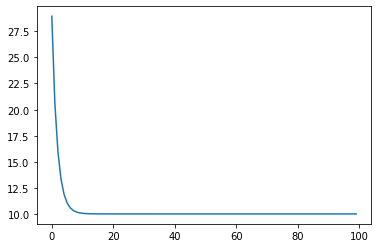

In [117]:
plt.plot(range(epochs), losses)

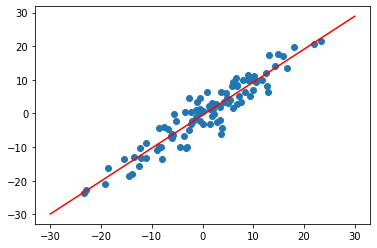

In [118]:
plot_fit("Trained Model")